<a href="https://colab.research.google.com/github/N-nolwenn/RepositoryTest/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.  
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 72ms/step - loss: 0.5398 - accuracy: 0.7915 - val_loss: 0.4308 - val_accuracy: 0.8528
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3392 - accuracy: 0.8961 - val_loss: 0.3238 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2463 - accuracy: 0.9201 - val_loss: 0.3007 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1944 - accuracy: 0.9357 - val_loss: 0.2988 - val_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1577 - accuracy: 0.9491 - val_loss: 0.2864 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1278 - accuracy: 0.9607 - val_loss: 0.2877 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1072 - accuracy: 0.9669 - val_loss: 0.2986 - val_accuracy: 0.8840
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [10]:
#model2.compile()
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


#model2.fit()
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                     verbose=2,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 - 2s - loss: 0.5264 - accuracy: 0.7856 - val_loss: 0.4112 - val_accuracy: 0.8486 - 2s/epoch - 65ms/step
Epoch 2/20
30/30 - 1s - loss: 0.3156 - accuracy: 0.8984 - val_loss: 0.3607 - val_accuracy: 0.8470 - 530ms/epoch - 18ms/step
Epoch 3/20
30/30 - 1s - loss: 0.2302 - accuracy: 0.9241 - val_loss: 0.2829 - val_accuracy: 0.8896 - 534ms/epoch - 18ms/step
Epoch 4/20
30/30 - 1s - loss: 0.1775 - accuracy: 0.9425 - val_loss: 0.2740 - val_accuracy: 0.8915 - 528ms/epoch - 18ms/step
Epoch 5/20
30/30 - 1s - loss: 0.1462 - accuracy: 0.9521 - val_loss: 0.2817 - val_accuracy: 0.8893 - 649ms/epoch - 22ms/step
Epoch 6/20
30/30 - 1s - loss: 0.1198 - accuracy: 0.9623 - val_loss: 0.2911 - val_accuracy: 0.8860 - 538ms/epoch - 18ms/step
Epoch 7/20
30/30 - 1s - loss: 0.0992 - accuracy: 0.9698 - val_loss: 0.3074 - val_accuracy: 0.8853 - 536ms/epoch - 18ms/step
Epoch 8/20
30/30 - 1s - loss: 0.0840 - accuracy: 0.9750 - val_loss: 0.3345 - val_accuracy: 0.8831 - 531ms/epoch - 18ms/step
Epoch 9/20


### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

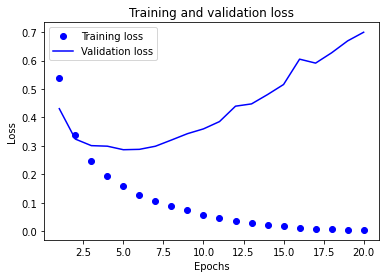

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [ ]:
layers.Dropout?

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6274 - accuracy: 0.6368 - val_loss: 0.4809 - val_accuracy: 0.8425
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4848 - accuracy: 0.7785 - val_loss: 0.3718 - val_accuracy: 0.8623
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4042 - accuracy: 0.8377 - val_loss: 0.3092 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3295 - accuracy: 0.8762 - val_loss: 0.2977 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2800 - accuracy: 0.9012 - val_loss: 0.2748 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2479 - accuracy: 0.9141 - val_loss: 0.2789 - val_accuracy: 0.8892
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2149 - accuracy: 0.9274 - val_loss: 0.2976 - val_accuracy: 0.8869
Epoch 8/20
30

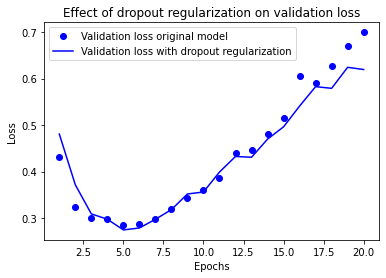

In [12]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history2_dropout = model2_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#to visualize graphs
import matplotlib.pyplot as plt
val_loss = history_dict["val_loss"]
val_loss2 = history2_dropout.history["val_loss"]

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss, "bo", label="Validation loss original model")
plt.plot(epochs, val_loss2, "b", label="Validation loss with dropout regularization")

plt.title("Effect of dropout regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [13]:
from tensorflow.keras import regularizers

In [14]:
## Add l1 regularization on the second dense layers 

model2_ar = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l1(0.002), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.0252 - accuracy: 0.9990 - val_loss: 0.7715 - val_accuracy: 0.8580
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.7809 - val_accuracy: 0.8578
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.7790 - val_accuracy: 0.8547
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0207 - accuracy: 0.9999 - val_loss: 0.7840 - val_accuracy: 0.8581
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0203 - accuracy: 0.9999 - val_loss: 0.7801 - val_accuracy: 0.8571
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.7839 - val_accuracy: 0.8548
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.7860 - val_accuracy: 0.8566
Epoch 8/20
30

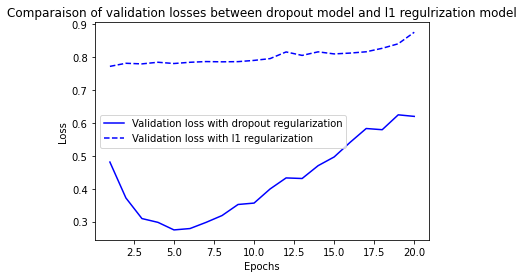

In [17]:
model2_ar.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history2_add = model2_ar.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
#to visualize graphs
import matplotlib.pyplot as plt
#val_loss = history_dict["val_loss"]
val_loss2 = history2_dropout.history["val_loss"]
val_loss3 = history2_add.history["val_loss"]

epochs = range(1, len(loss_values) + 1)
#plt.plot(epochs, val_loss, "bo", label="Validation loss original model")
plt.plot(epochs, val_loss2, "b", label="Validation loss with dropout regularization")
plt.plot(epochs, val_loss3, "b--", label="Validation loss with l1 regularization")

plt.title("Comparaison of validation losses between dropout model and l1 regulrization model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()